# 4: XGBoost (Variable Weight & Feature Engineering)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 

In [2]:
path_tor = ('Toronto_listings.csv') #Toronto Data
path_van = ('Vancouver_listings.csv') #Vancouver Data
path_mtl = ('Montreal_listings.csv') #Montreal Data
path_bar = ('Barcelona_listings.csv') #Barcelona Data
path_la = ('LA_listings.csv') #LA Data
path_chi = ('Chicago_listings.csv') #Chicago Data
path_sto = ('Stockholm_listings.csv') #Stockholm Data
path_syd = ('Sydney_listings.csv') #Sydney Data
df_tor = pd.read_csv(path_tor, header=0, index_col=0)
df_van = pd.read_csv(path_van, header=0, index_col=0)
df_mtl = pd.read_csv(path_mtl, header=0, index_col=0)
df_bar = pd.read_csv(path_bar, header=0, index_col=0)
df_la = pd.read_csv(path_la, header=0, index_col=0)
df_chi = pd.read_csv(path_chi, header=0, index_col=0)
df_sto = pd.read_csv(path_sto, header=0, index_col=0)
df_syd = pd.read_csv(path_syd, header=0, index_col=0)

In [3]:
# Remove where Toronto prices > 300
condition = df_tor[df_tor['price'] > 300]
rows_to_drop = condition.index
print("Toronto dataset dropped {} rows.".format(condition.shape[0]))
df_tor = df_tor.drop(rows_to_drop, axis=0)
# Remove where Montreal prices > 250
condition = df_mtl[df_mtl['price'] > 250]
rows_to_drop = condition.index
print("Montreal dataset dropped {} rows.".format(condition.shape[0]))
df_mtl = df_mtl.drop(rows_to_drop, axis=0)
# Remove where Vancouver prices > 350
condition = df_van[df_van['price'] > 350]
rows_to_drop = condition.index
print("Vancouver dataset dropped {} rows.".format(condition.shape[0]))
df_van = df_van.drop(rows_to_drop, axis=0)
# Remove where Barcelona prices > 320
condition = df_bar[df_bar['price'] > 320]
rows_to_drop = condition.index
print("Barcelona dataset dropped {} rows.".format(condition.shape[0]))
df_bar = df_bar.drop(rows_to_drop, axis=0)
# Remove where Chicago prices > 450
condition = df_chi[df_chi['price'] > 450]
rows_to_drop = condition.index
print("Chicago dataset dropped {} rows.".format(condition.shape[0]))
df_chi = df_chi.drop(rows_to_drop, axis=0)
# Remove where LA prices > 600
condition = df_la[df_la['price'] > 600]
rows_to_drop = condition.index
print("LA dataset dropped {} rows.".format(condition.shape[0]))
df_la = df_la.drop(rows_to_drop, axis=0)
# Remove where Stockholm prices > 400
condition = df_sto[df_sto['price'] > 400]
rows_to_drop = condition.index
print("Stockholm dataset dropped {} rows.".format(condition.shape[0]))
df_sto = df_sto.drop(rows_to_drop, axis=0)
# Remove where Sydney prices > 650
condition = df_syd[df_syd['price'] > 650]
rows_to_drop = condition.index
print("Sydney dataset dropped {} rows.".format(condition.shape[0]))
df_syd = df_syd.drop(rows_to_drop, axis=0)

Toronto dataset dropped 848 rows.
Montreal dataset dropped 742 rows.
Vancouver dataset dropped 274 rows.
Barcelona dataset dropped 809 rows.
Chicago dataset dropped 457 rows.
LA dataset dropped 2764 rows.
Stockholm dataset dropped 134 rows.
Sydney dataset dropped 804 rows.


In [4]:
df_chi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5311 entries, 2384 to 53826192
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   description                  5311 non-null   object 
 1   host_id                      5311 non-null   int64  
 2   host_location                5301 non-null   object 
 3   host_response_time           4022 non-null   object 
 4   host_response_rate           4022 non-null   object 
 5   host_acceptance_rate         4242 non-null   object 
 6   host_is_superhost            5310 non-null   object 
 7   host_total_listings_count    5310 non-null   float64
 8   neighbourhood                5311 non-null   object 
 9   latitude                     5311 non-null   float64
 10  longitude                    5311 non-null   float64
 11  property_type                5311 non-null   object 
 12  room_type                    5311 non-null   object 
 13  accommodate

In [5]:
df_chi = df_chi.drop(['description','host_id','property_type', 'host_location','host_is_superhost', 'host_response_time','host_response_rate','host_acceptance_rate','host_total_listings_count','amenities','Accomodation Bin','private_shared','bathrooms_text'], axis=1)


In [6]:
df_chi['bathrooms'] = df_chi['bathrooms'].fillna(df_chi['bathrooms'].median())
df_chi['bedrooms'] = df_chi['bedrooms'].fillna(df_chi['bedrooms'].median())
df_chi['beds'] = df_chi['beds'].fillna(df_chi['beds'].mean())
df_chi['review_scores_rating'] = df_chi['review_scores_rating'].fillna(df_chi['review_scores_rating'].median())
df_chi['review_scores_accuracy'] =df_chi['review_scores_accuracy'].fillna(df_chi['review_scores_accuracy'].median())
df_chi['review_scores_cleanliness'] = df_chi['review_scores_cleanliness'].fillna(df_chi['review_scores_cleanliness'].median())
df_chi['review_scores_checkin'] = df_chi['review_scores_checkin'].fillna(df_chi['review_scores_checkin'].median())
df_chi['review_scores_communication'] = df_chi['review_scores_communication'].fillna(df_chi['review_scores_communication'].median())
df_chi['review_scores_location'] = df_chi['review_scores_location'].fillna(df_chi['review_scores_location'].median())
df_chi['review_scores_value'] = df_chi['review_scores_value'].fillna(df_chi['review_scores_value'].median())

df_chi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5311 entries, 2384 to 53826192
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood                5311 non-null   object 
 1   latitude                     5311 non-null   float64
 2   longitude                    5311 non-null   float64
 3   room_type                    5311 non-null   object 
 4   accommodates                 5311 non-null   int64  
 5   bathrooms                    5311 non-null   float64
 6   bedrooms                     5311 non-null   float64
 7   beds                         5311 non-null   float64
 8   price                        5311 non-null   float64
 9   minimum_nights               5311 non-null   int64  
 10  maximum_nights               5311 non-null   int64  
 11  availability_30              5311 non-null   int64  
 12  availability_60              5311 non-null   int64  
 13  availabilit

In [7]:
for col in ['neighbourhood', 'room_type']:
    df_chi[col] = df_chi[col].astype('category')

In [8]:
target = df_chi[["price"]] 
features = df_chi.drop(["price"], axis=1)
num_feats = features.select_dtypes(include=['float64', 'int64', 'bool']).copy()

cat_feats = features.select_dtypes(include=['category']).copy()
cat_feats = pd.get_dummies(cat_feats)
features_recoded = pd.concat([num_feats, cat_feats], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_recoded, target, test_size=0.2) #split data

In [10]:
sc = StandardScaler() #Scale data
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [11]:
booster = xgb.XGBRegressor()

In [12]:
%%time 
#Depending on the dataset size, this might take 5-10mins to run
from sklearn.model_selection import GridSearchCV 

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
             'max_depth': [3, 4, 5, 6, 7],
             'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}


booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)


booster_grid_search.fit(X_train, y_train)


print(booster_grid_search.best_params_)

{'colsample_bytree': 1, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}
Wall time: 3min 37s


In [13]:
%%time
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, 
                           max_depth=7, n_estimators=200, random_state=4) #Use best parameters found in step above
#Train
booster.fit(X_train, y_train)

#Predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

Wall time: 665 ms


In [14]:
%%time
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, 
                           max_depth=7, n_estimators=200, random_state=4) #Use best parameters found in step above
#Train
booster.fit(X_train, y_train)

#Predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

Wall time: 747 ms


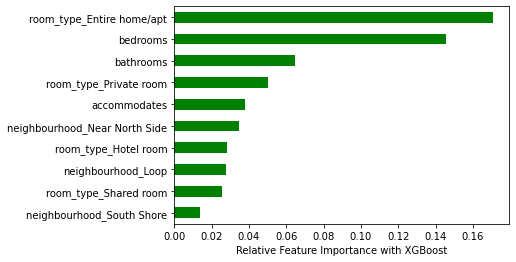

In [15]:
# plot the important features
feat_importances = pd.Series(booster.feature_importances_, index=features_recoded.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='green')
plt.xlabel('Relative Feature Importance with XGBoost');

In [16]:
feat_importances.nlargest(10).sort_values()

neighbourhood_South Shore        0.013724
room_type_Shared room            0.025717
neighbourhood_Loop               0.027745
room_type_Hotel room             0.028402
neighbourhood_Near North Side    0.034413
accommodates                     0.037918
room_type_Private room           0.050022
bathrooms                        0.064760
bedrooms                         0.145500
room_type_Entire home/apt        0.170801
dtype: float32

In [17]:
#Drop variables that aren't in the Top 10
df_chi = df_chi.drop(['availability_30','availability_60','availability_90','review_scores_rating','latitude','longitude','availability_365','instant_bookable','minimum_nights','maximum_nights','number_of_reviews','review_scores_location','review_scores_communication','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_value',], axis=1)
df_chi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5311 entries, 2384 to 53826192
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   neighbourhood  5311 non-null   category
 1   room_type      5311 non-null   category
 2   accommodates   5311 non-null   int64   
 3   bathrooms      5311 non-null   float64 
 4   bedrooms       5311 non-null   float64 
 5   beds           5311 non-null   float64 
 6   price          5311 non-null   float64 
dtypes: category(2), float64(4), int64(1)
memory usage: 262.2 KB


In [18]:
for col in ['neighbourhood', 'room_type']:
    df_chi[col] = df_chi[col].astype('category')

In [19]:
target = df_chi[["price"]] 
features = df_chi.drop(["price"], axis=1)
num_feats = features.select_dtypes(include=['float64', 'int64', 'bool']).copy()

cat_feats = features.select_dtypes(include=['category']).copy()
cat_feats = pd.get_dummies(cat_feats)
features_recoded = pd.concat([num_feats, cat_feats], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_recoded, target, test_size=0.2) #split data
sc = StandardScaler() #Scale data
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
booster = xgb.XGBRegressor()


booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, 
                           max_depth=7, n_estimators=200, random_state=4)

booster.fit(X_train, y_train)


y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 2)}")
MSE = mean_squared_error(y_test, y_pred_test)
print(f"MSE: {round(MSE, 2)}")
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")
n=y_test.shape[0]
p=5
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(f"Adjusted r2: {round(adj_r2, 4)}")

RMSE: 63.54
MSE: 4037.61
r2: 0.4846
Adjusted r2: 0.4822


In [20]:
xg_train = xgb.DMatrix(data=X_train, label=y_train)
params = {'colsample_bytree':0.6, 'gamma':0.0, 'learning_rate':0.05, 'max_depth':7}

cv_results = xgb.cv(dtrain=xg_train, params=params, nfold=8,
                    num_boost_round=300, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True)

In [21]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,171.960619,0.673554,171.976150,4.826491
1,164.747038,0.664674,164.787969,4.774005
2,157.935616,0.666852,158.043741,4.707900
3,151.563211,0.741132,151.744616,4.598528
4,145.475513,0.716804,145.720381,4.575519


In [22]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
127,55.325726,0.449434,62.369121,2.839619
128,55.311404,0.447594,62.369787,2.839469
129,55.299666,0.448002,62.368714,2.840342
130,55.285561,0.443995,62.367032,2.837993
131,55.269397,0.439517,62.363963,2.837087


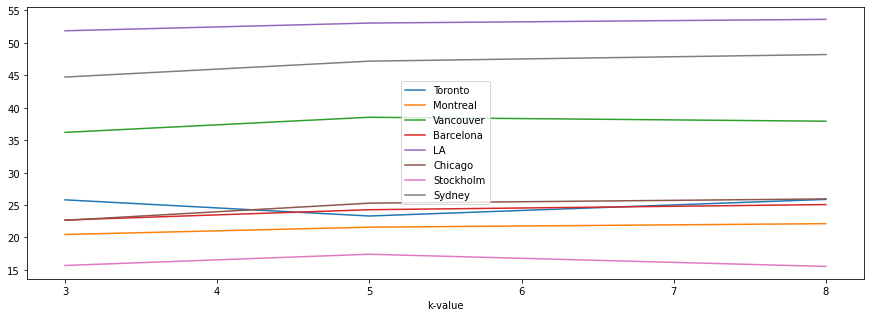

In [23]:
path_RMSE = ('TrainRMSE1.csv') 
df_trainRMSE = pd.read_csv(path_RMSE, header=0, index_col=0)
ax = df_trainRMSE.plot.line(figsize=(15, 5))

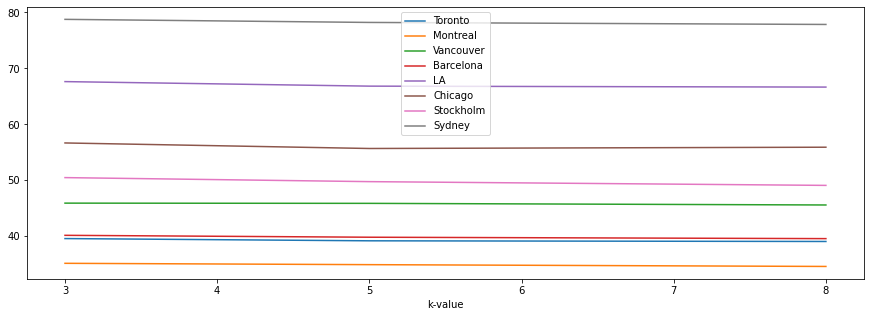

In [24]:
path_RMSE2 = ('TestRMSE1.csv') 
df_trainRMSE = pd.read_csv(path_RMSE2, header=0, index_col=0)
ax = df_trainRMSE.plot.line(figsize=(15, 5))